# LLM 模型比较分析

分析不同LLM模型的性能指标和特征。

In [1]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取数据
df = pd.read_csv('llm_comparison_dataset.csv')

# 显示基本信息
print("数据集基本信息:")
print(df.info())

print("\n数据集统计描述:")
print(df.describe())

数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Model                      200 non-null    object 
 1   Provider                   200 non-null    object 
 2   Context Window             200 non-null    int64  
 3   Speed (tokens/sec)         200 non-null    int64  
 4   Latency (sec)              200 non-null    float64
 5   Benchmark (MMLU)           200 non-null    int64  
 6   Benchmark (Chatbot Arena)  200 non-null    int64  
 7   Open-Source                200 non-null    int64  
 8   Price / Million Tokens     200 non-null    float64
 9   Training Dataset Size      200 non-null    int64  
 10  Compute Power              200 non-null    int64  
 11  Energy Efficiency          200 non-null    float64
 12  Quality Rating             200 non-null    int64  
 13  Speed Rating               200 non-null  

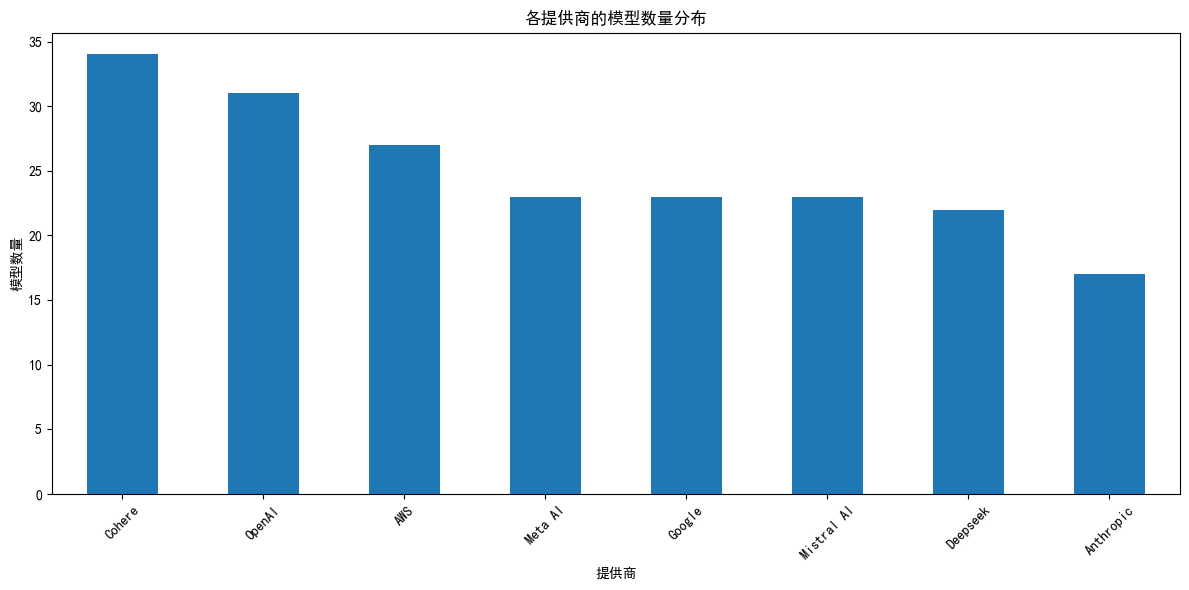

In [3]:
# 分析不同提供商的模型分布
provider_counts = df['Provider'].value_counts()

plt.figure(figsize=(12, 6))
provider_counts.plot(kind='bar')
plt.title('各提供商的模型数量分布')
plt.xlabel('提供商')
plt.ylabel('模型数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

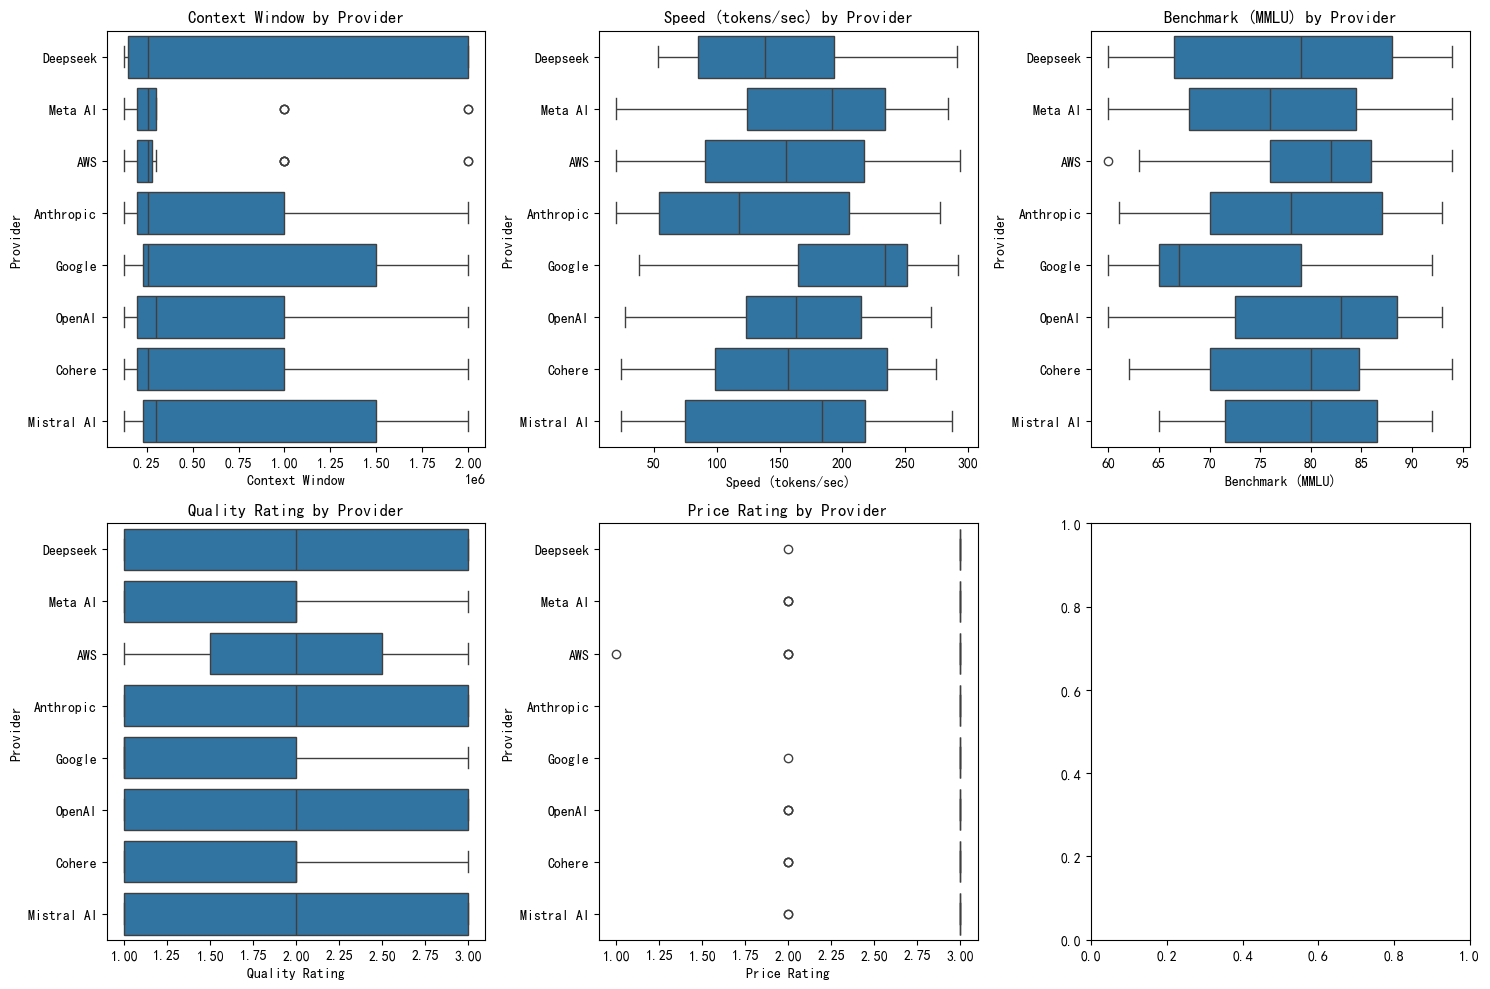

In [4]:
# 分析模型性能指标
metrics = ['Context Window', 'Speed (tokens/sec)', 'Benchmark (MMLU)', 'Quality Rating', 'Price Rating']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, metric in enumerate(metrics):
    if idx < len(axes):
        sns.boxplot(data=df, y='Provider', x=metric, ax=axes[idx])
        axes[idx].set_title(f'{metric} by Provider')

plt.tight_layout()
plt.show()

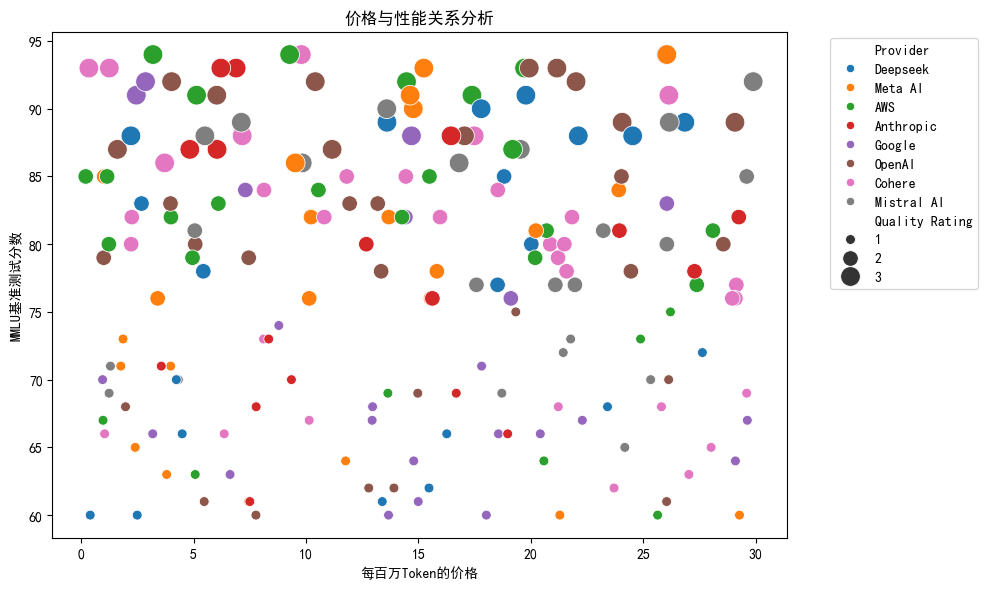

In [5]:
# 分析价格与性能的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price / Million Tokens', y='Benchmark (MMLU)', 
                hue='Provider', size='Quality Rating', sizes=(50, 200))
plt.title('价格与性能关系分析')
plt.xlabel('每百万Token的价格')
plt.ylabel('MMLU基准测试分数')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()